In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Our Idea:
Female riders are more likely to be younger than male riders.

#### Our Null Hypothesis:
Over the span of one month, the average age of female riders will be equal to or higher than the average age of male riders.

$H_0:  F_m >= M_m$

#### Our Alternative Hypothesis:
Over the span of one month, the average age of female riders will be less than the average age of male riders.

$H_a: F_m < M_m$

In [2]:
# checks list of available citibike data in the CUSP data facility
# line below is commented out, but uncomment to see the list again when running

#!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [3]:
datestring = '201707'
df = pd.read_csv('/gws/open/Student/citibike' + "/" + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [5]:
df['age'] = 2017 - df['birth year']
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
      'start station name', 'start station latitude',
      'start station longitude', 'end station id', 'end station name',
      'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year'
       ], axis=1, inplace=True)
df.head()

,gender,age
0,1,31.0
1,1,36.0
2,2,33.0
3,1,32.0
4,2,35.0


In [6]:
femaleAgeCount = df['age'][df['gender']==2].groupby(df['age']).count()
maleAgeCount   = df['age'][df['gender']==1].groupby(df['age']).count()
num_male       = len(df[(df['gender']==1)]) 
num_fem        = len(df[(df['gender']==2)])

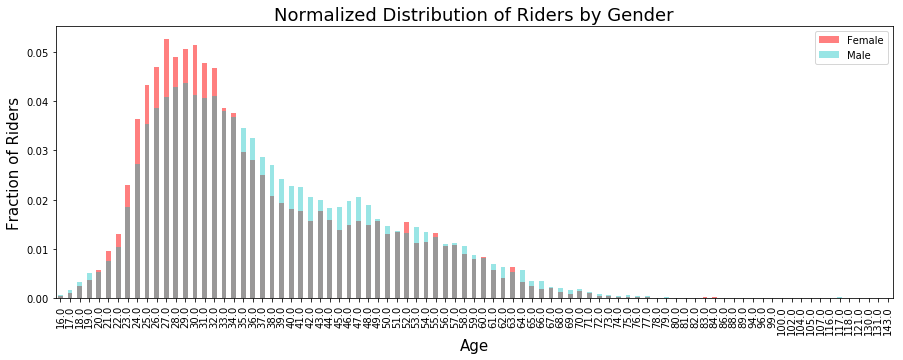

In [7]:
# Normalized
legendNames = ['Female','Male']
fig = figsize(15,5)
(femaleAgeCount/num_fem).plot(kind="bar", color = 'r', alpha = 0.5)
(maleAgeCount/num_male).plot(kind="bar", color = 'c', alpha = 0.4)
pl.xlabel('Age', fontsize=15)
pl.ylabel('Fraction of Riders', fontsize=15)
pl.title('Normalized Distribution of Riders by Gender', fontsize=18)
pl.legend(legendNames);

### Figure 1.
This plot shows the normalized distribution of the age of Citibike riders, split by gender. There appears to be a larger proportion of younger female riders vs. male riders, but this doesn't prove the hypothesis.

In [8]:
# finding average age of male and female riders
dfAvg = df.groupby('gender', as_index=False).age.mean()
dfAvg = dfAvg.drop(dfAvg.index[0]) # drops row for unidentified genders (gender=0)
dfAvg

,gender,age
1,1,37.813331
2,2,36.290960


In [9]:
dfAvg['gender'][1] = 'Male'
dfAvg['gender'][2] = 'Female'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

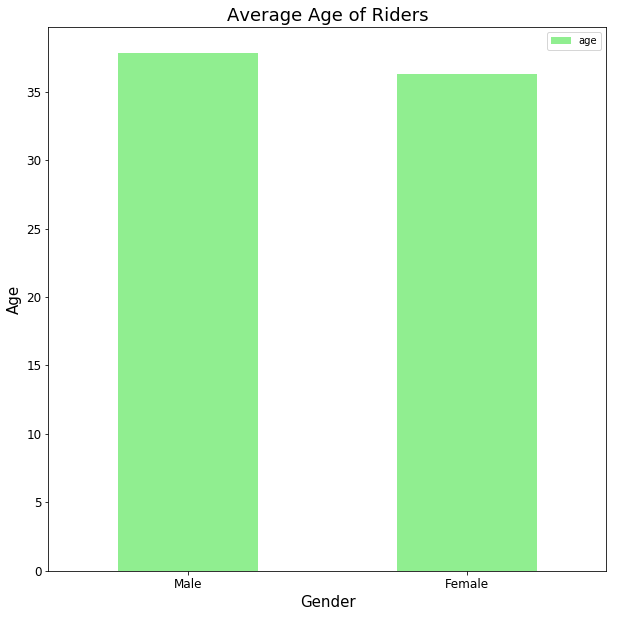

In [10]:
fig = pl.figure(figsize(10,10))
ax = dfAvg.plot(x = 'gender', y = 'age', kind="bar",color='lightgreen',rot=0, fontsize=12)
pl.xlabel('Gender', fontsize=15)
pl.ylabel('Age', fontsize=15)
pl.title('Average Age of Riders', fontsize=18);

### Figure 2.
This bar plot shows the average (mean) age of male vs. female Citibike riders. These means will be necessary to test our hypothesis.